# Instructions
- https://github.com/gSchool/dsi-multi-armed-bandit/blob/master/individual.md
- https://github.com/gSchool/dsi-multi-armed-bandit/blob/master/pair.md


solutions: https://github.com/gSchool/dsi-solns/blob/master/multi-armed-bandit/individual/individual_solns.ipynb

# Part A: A/B Testing

In [43]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.stats as scs
from scipy.stats import beta


# Loading in data - Site A and Site B Click-Through Rates

In [13]:
siteA = np.loadtxt('siteA.txt')

In [15]:
siteB = np.loadtxt('siteB.txt')

In [53]:
siteA #an array of 0's and 1's (the outcome of each visit, for a total of )

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0

# Creating priors

In [120]:
# creating a range of 100 pts from 0 to 1, in steps of 0.01
x = np.arange(0, 1.01, 0.01)

In [18]:
# creating a uniform distribution from the above x
y = scs.uniform().pdf(x)

In [19]:
# plotting the distribution
def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())

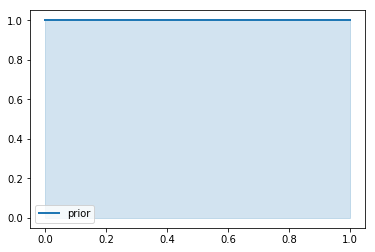

In [24]:
plot_with_fill(x = x, y = y, label='prior')
plt.legend(['prior'])
plt.show()

# looks like this because it's literally a uniform distribution

# Alpha and Beta 0
(for first 50 views)

In [33]:
siteA_non_conversions = (siteA[0:50] == 0).sum()
siteA_conversions = (siteA[0:50] == 1).sum()

In [34]:
siteA_non_conversions

45

In [35]:
siteA_conversions

5

In [36]:
siteA_visits = siteA_non_conversions + siteA_conversions

In [ ]:
# now I need to figure out how to plot the pdf of a beta function
# I think it's (alpha0 + success) / (alpha0 + beta0 + total) 
# since our alpha0 == beta0 == 1, then we just do success / total for the posterior here

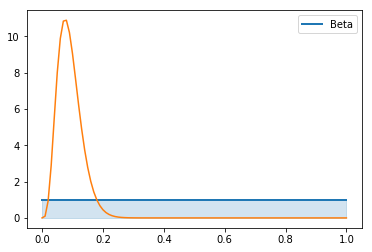

In [54]:
plot_with_fill(x = x, y = y, label='prior')
plt.legend(['prior'])

plt.plot(x, beta.pdf(x, siteA_conversions, siteA_visits)) #beta.pdf(x, a, b)
plt.legend(['Beta'])

# figure out how to get the legends right...

# Alpha Beta 1 - Site A
with 50, 100, 200, 400, 800 views

In [91]:
# trying as a function... but gave up
# def parameters(data,sets):
#     successes = []
#     totals = []
#     for n in sets:
#         siteA_non_conversions = (siteA[0:n] == 0).sum()
#         siteA_conversions = (siteA[0:n] == 1).sum()
#         successes.append(siteA_conversions)
#         siteA_visits = siteA_non_conversions + siteA_conversions
#         totals.append(siteA_visits)
#     result = [successes,totals]
#     return result

In [131]:
sets = [50,100,200,400,800]
successes_A = []
totals_A = []

for n in sets:
    siteA_non_conversions = (siteA[0:n] == 0).sum()
    siteA_conversions = (siteA[0:n] == 1).sum()
    successes_A.append(siteA_conversions)
    siteA_visits = siteA_non_conversions + siteA_conversions
    totals_A.append(siteA_visits)
print(successes_A)
print(totals_A)

[5, 10, 15, 26, 53]
[50, 100, 200, 400, 800]


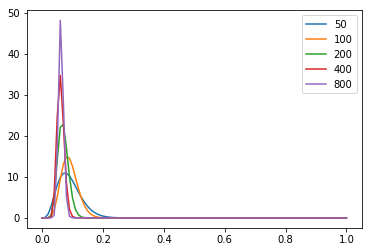

In [132]:
labels = ['50','100','200','400','800']
for i in range(len(successes_A)):
    plt.plot(x, beta.pdf(x, successes_A[i], totals_A[i]),label=labels[i])
    plt.legend(loc='upper right')

# Alpha Beta 1 - Both sites
with 50, 100, 200, 400, 800 views

In [133]:
sets = [50,100,200,400,800]
successes = []
totals = []

for n in sets:
    siteA_non_conversions = (siteA[0:n] == 0).sum()
    siteA_conversions = (siteA[0:n] == 1).sum()
    successes.append(siteA_conversions)
    
    siteB_non_conversions = (siteB[0:n] == 0).sum()
    siteB_conversions = (siteB[0:n] == 1).sum()
    successes.append(siteB_conversions)

    siteA_visits = siteA_non_conversions + siteA_conversions
    totals.append(siteA_visits)
    
    siteB_visits = siteB_non_conversions + siteB_conversions
    totals.append(siteB_visits)
    
print(successes)
print(totals)

[5, 3, 10, 9, 15, 18, 26, 39, 53, 82]
[50, 50, 100, 100, 200, 200, 400, 400, 800, 800]


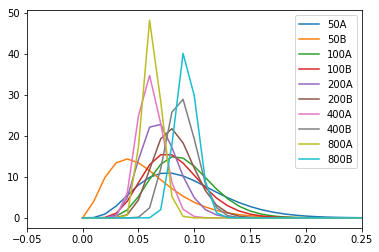

In [136]:
labels = ['50A','50B','100A','100B','200A','200B','400A','400B','800A','800B']
for i in range(len(successes)):
    plt.plot(x, beta.pdf(x, successes[i], totals[i]),label=labels[i])
    plt.legend(loc='upper right')
    plt.xlim(xmax=0.25)

You can see that the majority of the time site B is better than site A, but there is a chance that site A is better.

# Testing which site is better
we sample 10,000 observations from A and B beta distributions

In [155]:
print('siteA_conversions', siteA_conversions)
print('siteB_conversions', siteB_conversions)
print('siteA_visits', siteA_visits)
print('siteB_visits', siteB_visits)

siteA_conversions 53
siteB_conversions 82
siteA_visits 800
siteB_visits 800


In [181]:
sample_a = np.random.beta(siteA_conversions,siteA_visits, size = 10000)#rv = beta(a, b)
sample_b = np.random.beta(siteB_conversions,siteB_visits, size = 10000)

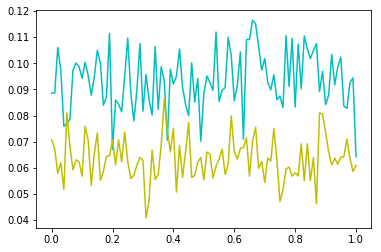

In [182]:
# visualizing the points it was grabbing from the random numbers ^
plt.plot(x,sample_b[0:101], color = 'c')
plt.plot(x,sample_a[0:101], color = 'y')

In [185]:
b_better_a = sample_b[sample_b > sample_a]
len(b_better_a==True)

9922

In [186]:
b_percent_better_a = len(b_better_a==True) / 10000
b_percent_better_a

0.9922

#### this means that site b is better 99.22% of the time... I think

In [189]:
a = siteA_conversions
b = siteA_visits
credible_interval_a = [beta.ppf(0.05, a, b),beta.ppf(0.95, a, b)]
credible_interval_a

[0.049153726506042467, 0.076280649972182757]

doing 0.02 better? 

In [205]:
b_twoperbetter_a = sample_b[sample_b > (sample_a+0.02)]
len(b_twoperbetter_a==True)

7998

# Profitability

It's important to understand the business impact of your work as a data scientist. Imagine that your company is debating whether to switch to site B from site A. Assume the following:

- the average click on site A yields 1.00 in profit
- the average click on site B yields 1.05 in profit

Should your company invest in switching to site B? Assume it is costly to do so, both in time and money. Explain. (Hint: The answer is not obvious.)

In [197]:
# creating a range of 800 pts from 0 to 1, in steps of 0.01
step = 1/10000
all_x = np.arange(0, 1 + step, step)

In [195]:
all_sample_a = np.random.beta(siteA_conversions,siteA_visits, size = 10000)#rv = beta(a, b)
all_sample_b = np.random.beta(siteB_conversions,siteB_visits, size = 10000)

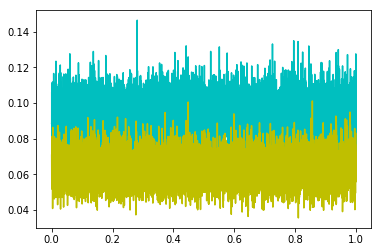

In [200]:
plt.plot(all_x[0:10000],sample_b, color = 'c')
plt.plot(all_x[0:10000],sample_a, color = 'y')

In [202]:
profit_a = 1
profit_b = 1.05

profitability_a = np.sum(all_sample_a) * profit_a
profitability_b = np.sum(all_sample_b) * profit_b

difference = profitability_b - profitability_a
difference

355.11934275720785

if the switching cost is < $355, then should move

# Part B: Bandits

In [204]:
# of 5%, 3% and 6%. So hopefully we learn that the last one is the best!

from bandits import Bandits
from banditstrategy import BanditStrategy

bandits = Bandits([0.05, 0.03, 0.06])
strat = BanditStrategy(bandits, 'random_choice')
strat.sample_bandits(1000)
print("Number of trials: ", strat.trials)
print("Number of wins: ", strat.wins)
print("Conversion rates: ", strat.wins / strat.trials)
print("A total of %d wins of %d trials." % \
    (strat.wins.sum(), strat.trials.sum()))

ModuleNotFoundError: No module named 'bandits'